In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm


In [23]:
df=pd.read_csv('PCA_data.csv',delimiter=',')
df.head()

customer_id  customer_region_2440  customer_region_2490  \
0  1b8f824d5e                   0.0                   0.0   
1  5d272b9dcb                   0.0                   0.0   
2  f6d1b2ba63                   0.0                   0.0   
3  180c632ed8                   0.0                   0.0   
4  4eb37a6705                   0.0                   0.0   

   customer_region_4140  customer_region_4660  customer_region_8370  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   1.0                   0.0   

   customer_region_8550  customer_region_8670  customer_region_Unknown  \
0                   0.0                   0.0                      0.0   
1                   0.0                   1.0                      0.0   
2                   0.0                   0.0                      0.0   
3                   0.0                   0.0                      0.0   
4                   0.0                   0.0                      0.0   

   last_promo_DISCOUNT  ...  payment_method_CASH  payment_method_DIGI  \
0                  0.0  ...                  0.0                  1.0   
1                  1.0  ...                  0.0                  1.0   
2                  1.0  ...                  1.0                  0.0   
3                  0.0  ...                  0.0                  1.0   
4                  0.0  ...                  0.0                  1.0   

        PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0 -0.295945 -0.445237 -0.778433  0.311961  0.054672 -0.110476 -0.141609   
1 -0.296883 -0.497895 -0.761456 -0.009660 -0.092699 -0.076241 -0.158929   
2 -0.119790 -0.444279 -0.729543  0.132792 -0.512660  0.111132  0.161004   
3 -0.322302 -0.328141 -0.746995  0.004326 -0.071154 -0.082533 -0.019563   
4 -0.322450 -0.345026 -0.739681 -0.125103 -0.134561 -0.107185 -0.109648   

        PC7  
0  0.232893  
1 -0.065966  
2 -0.060958  
3  0.033507  
4  0.229223  

[5 rows x 22 columns]

In [24]:
metric_features=df.columns

In [25]:
df.set_index('customer_id',inplace=True)

In [ ]:
range_clusters = range(1, 50)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.17218893788101888
For n_clusters = 3, the average silhouette_score is : 0.1816431209927478
For n_clusters = 4, the average silhouette_score is : 0.15486618499391921
For n_clusters = 5, the average silhouette_score is : 0.17127758115128894
For n_clusters = 6, the average silhouette_score is : 0.18413062408085695
For n_clusters = 7, the average silhouette_score is : 0.2004264971316396
For n_clusters = 8, the average silhouette_score is : 0.19495913074699567
For n_clusters = 9, the average silhouette_score is : 0.20318061770938348
For n_clusters = 10, the average silhouette_score is : 0.19876830222774372
For n_clusters = 11, the average silhouette_score is : 0.20342639903342272
For n_clusters = 12, the average silhouette_score is : 0.21121758860871595
For n_clusters = 13, the average silhouette_score is : 0.21244986222198098
For n_clusters = 14, the average silhouette_score is : 0.2157296194361765
For n_clusters = 15, the average sil

<ipython-input-21-ff31f339d92c>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(13, 7))


For n_clusters = 22, the average silhouette_score is : 0.2146042869260797
For n_clusters = 23, the average silhouette_score is : 0.21350973131306447
For n_clusters = 24, the average silhouette_score is : 0.2253646420294246
For n_clusters = 25, the average silhouette_score is : 0.21672687537685426
For n_clusters = 26, the average silhouette_score is : 0.20446561728335355
For n_clusters = 27, the average silhouette_score is : 0.21781816374546478
For n_clusters = 28, the average silhouette_score is : 0.2082023496764944
For n_clusters = 29, the average silhouette_score is : 0.2051913238877805
For n_clusters = 30, the average silhouette_score is : 0.2271165252753757
For n_clusters = 31, the average silhouette_score is : 0.21479878407818948
For n_clusters = 32, the average silhouette_score is : 0.2340119313776044
For n_clusters = 33, the average silhouette_score is : 0.20601165759412243
For n_clusters = 34, the average silhouette_score is : 0.21143156447287847
For n_clusters = 35, the averag

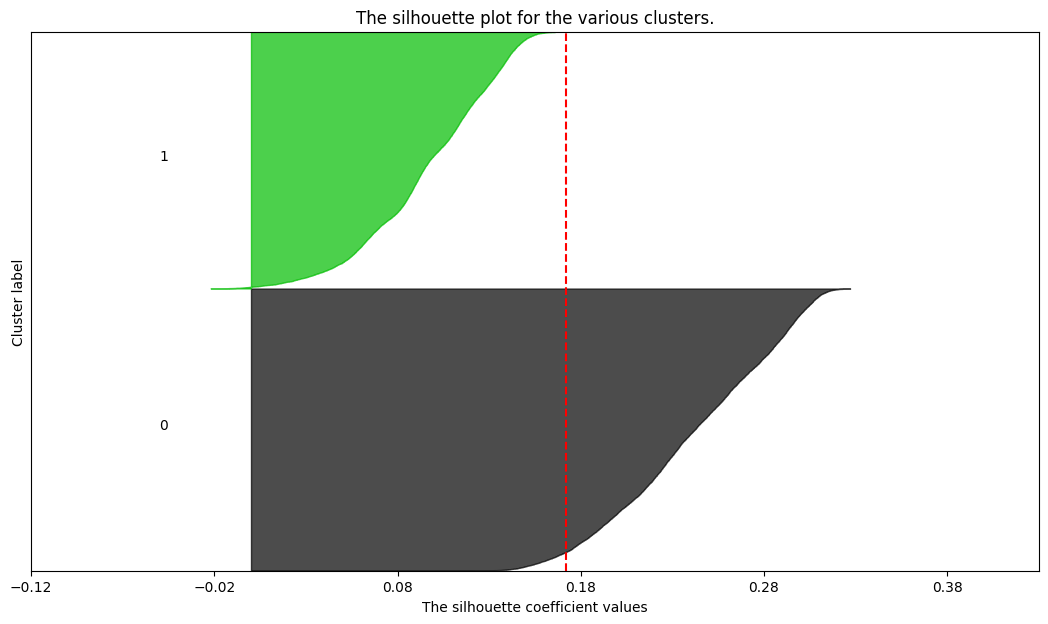

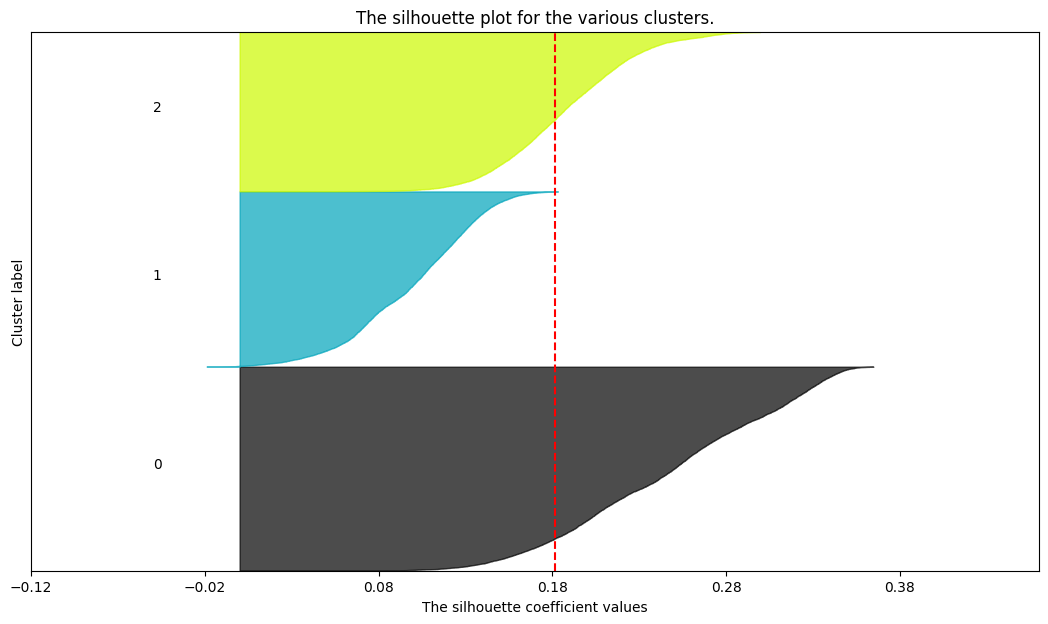

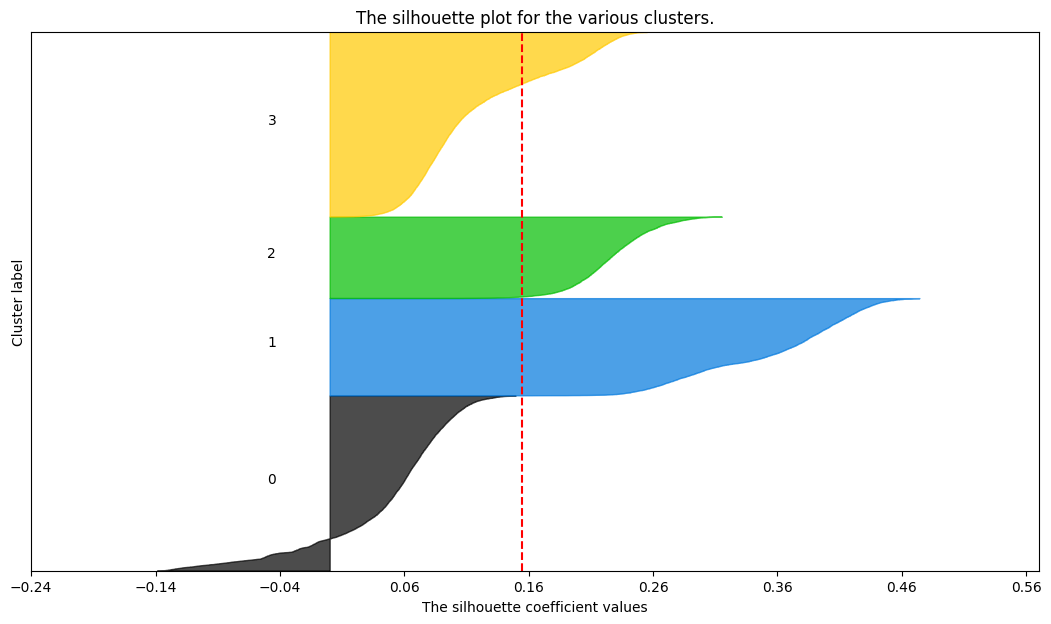

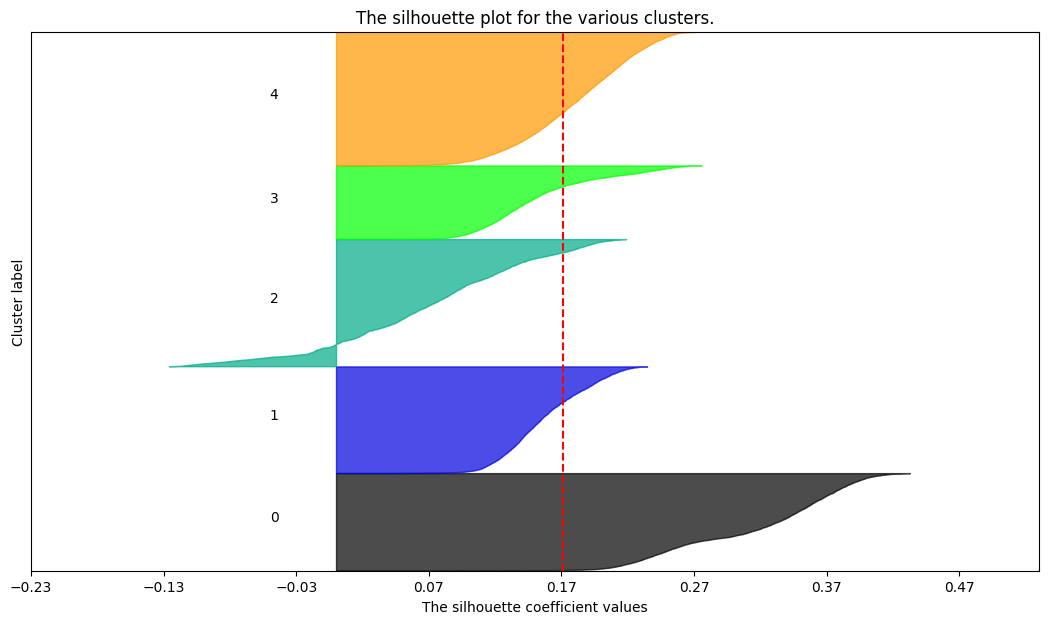

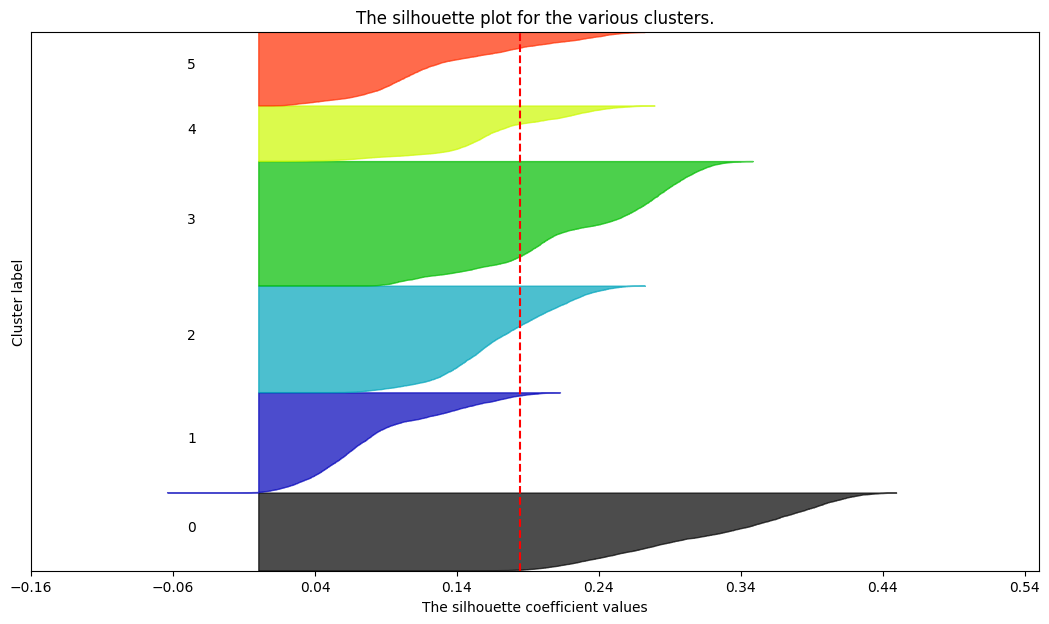

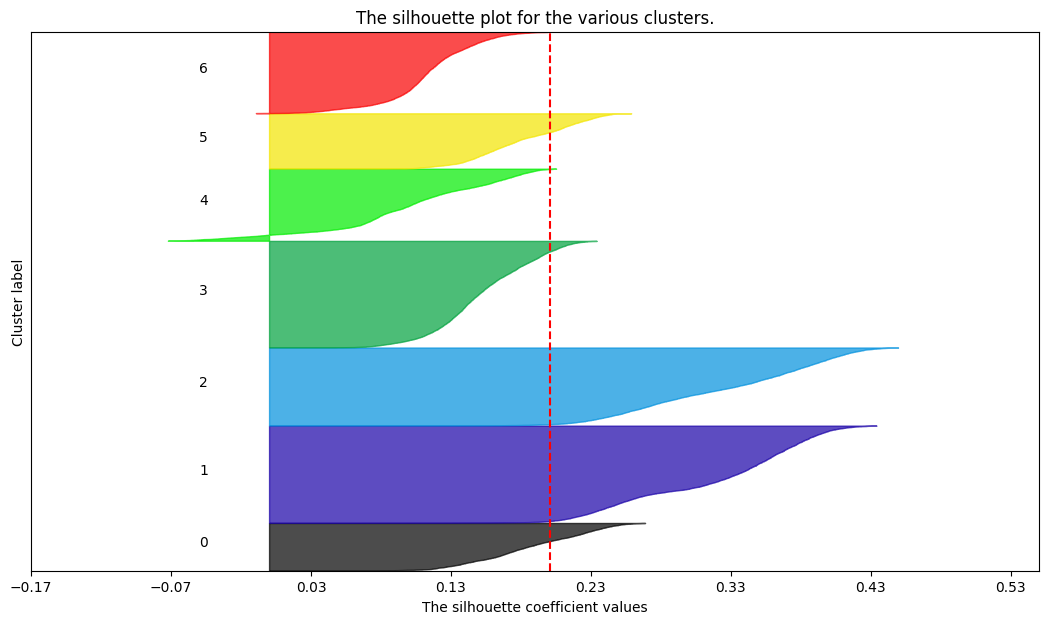

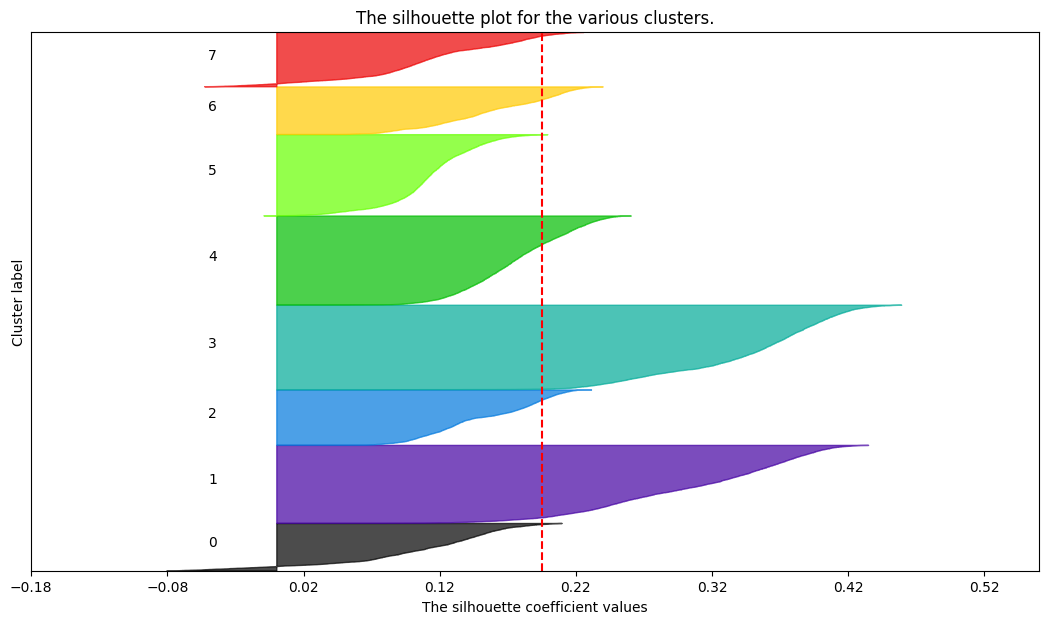

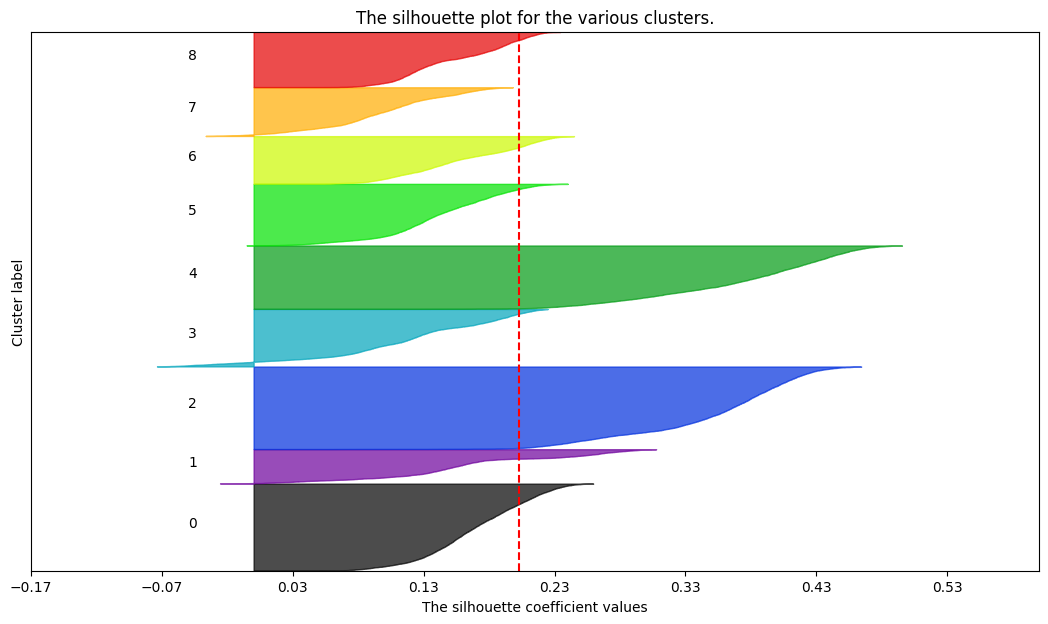

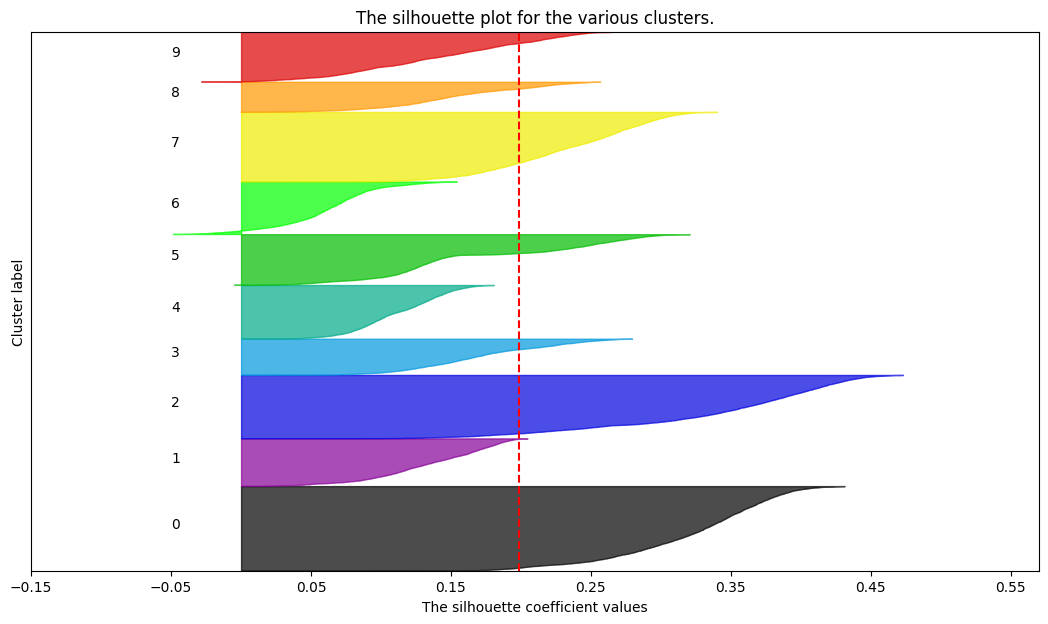

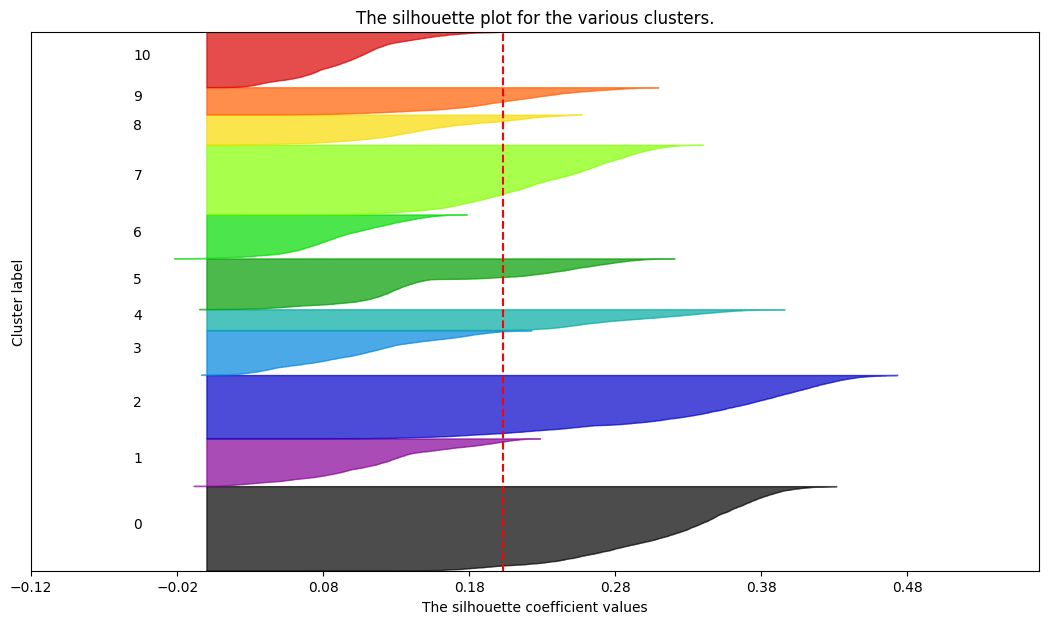

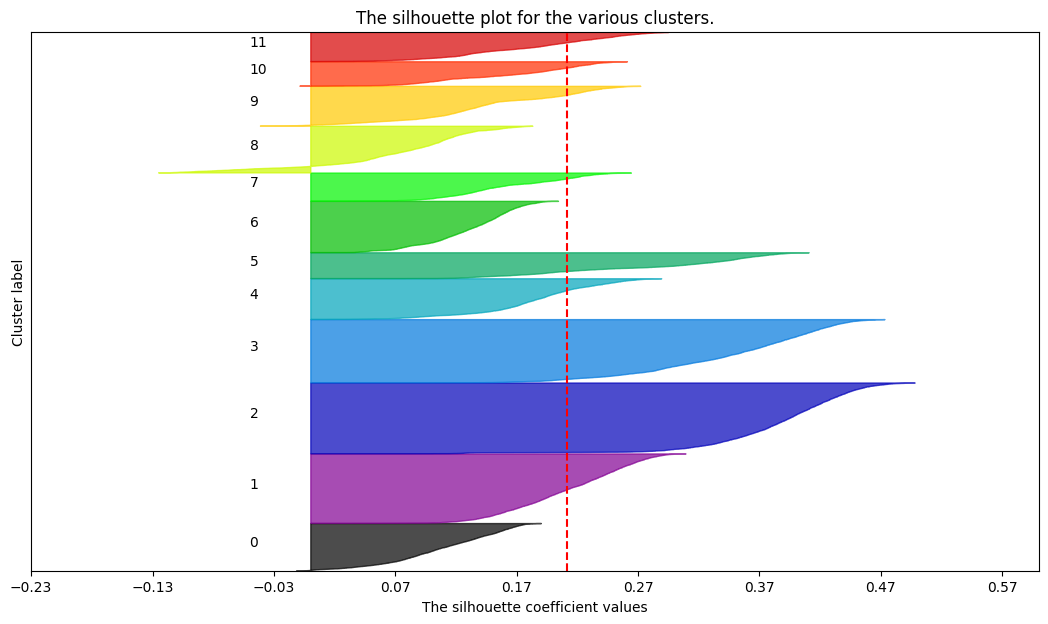

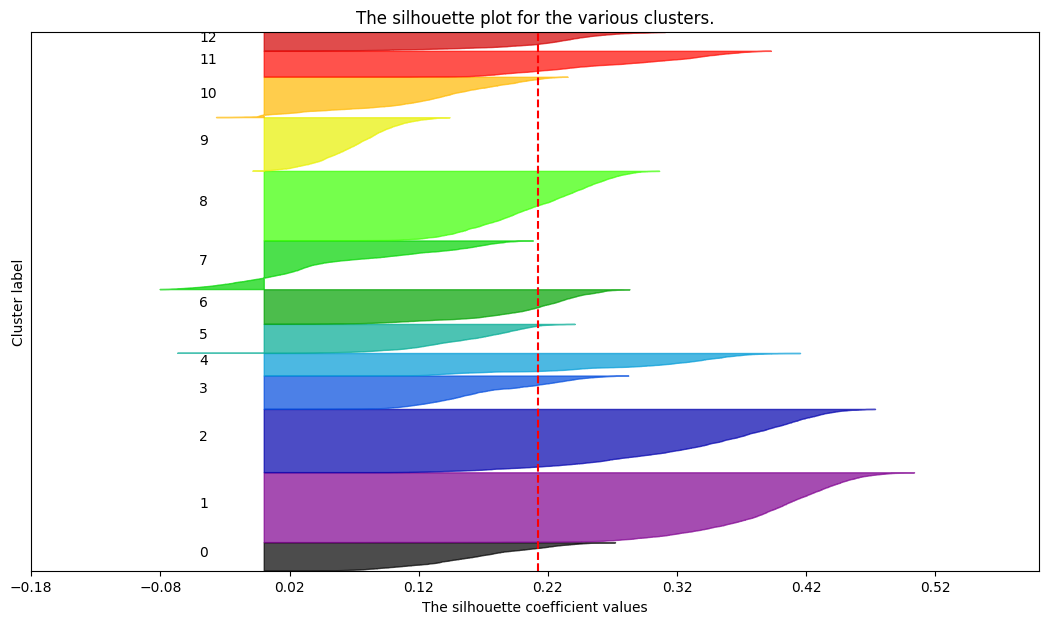

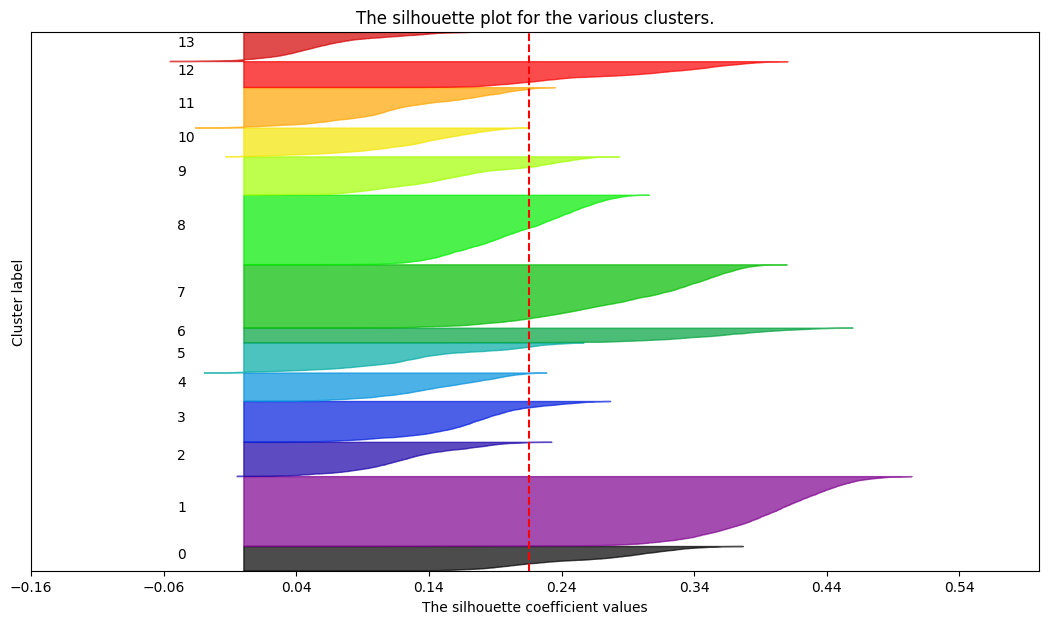

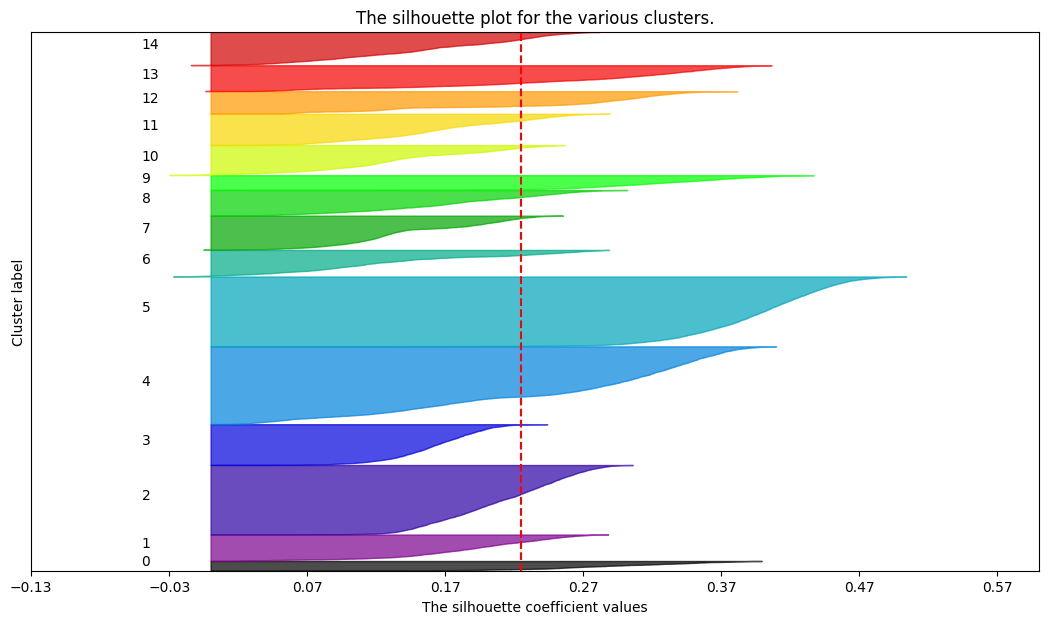

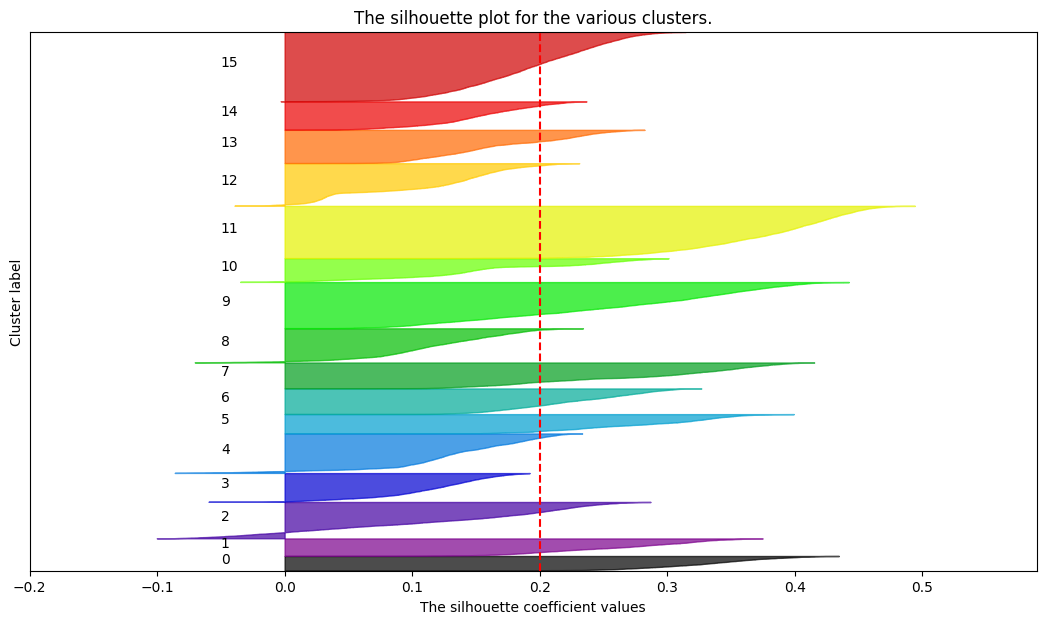

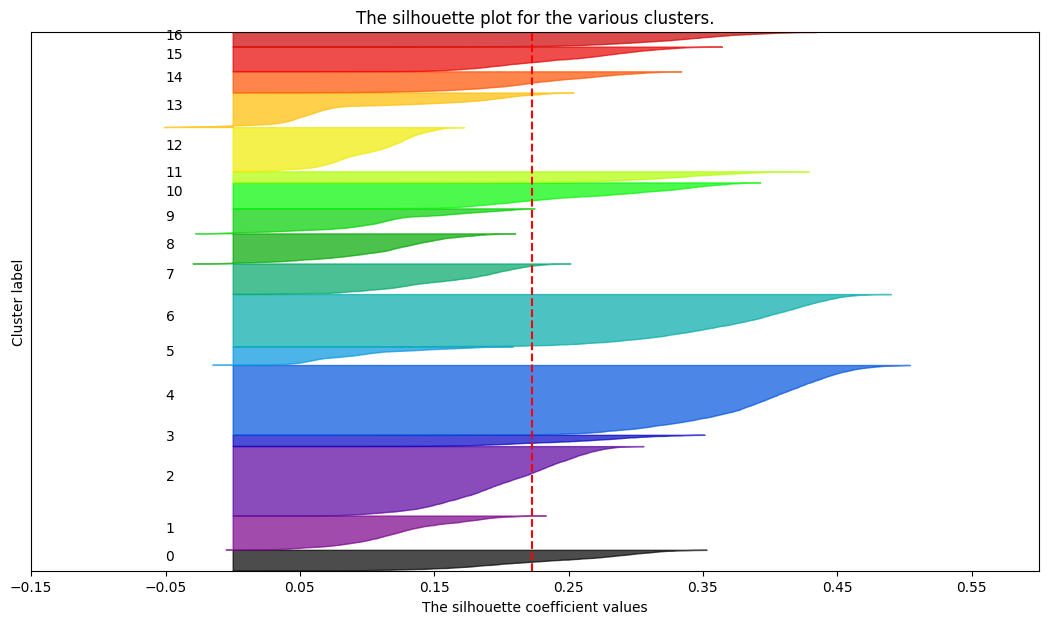

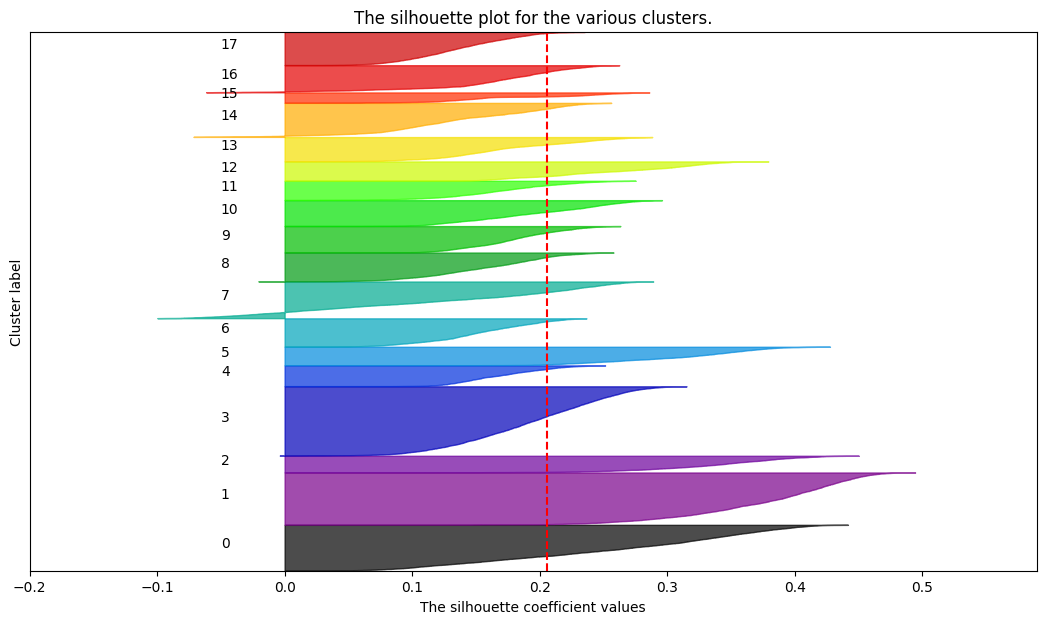

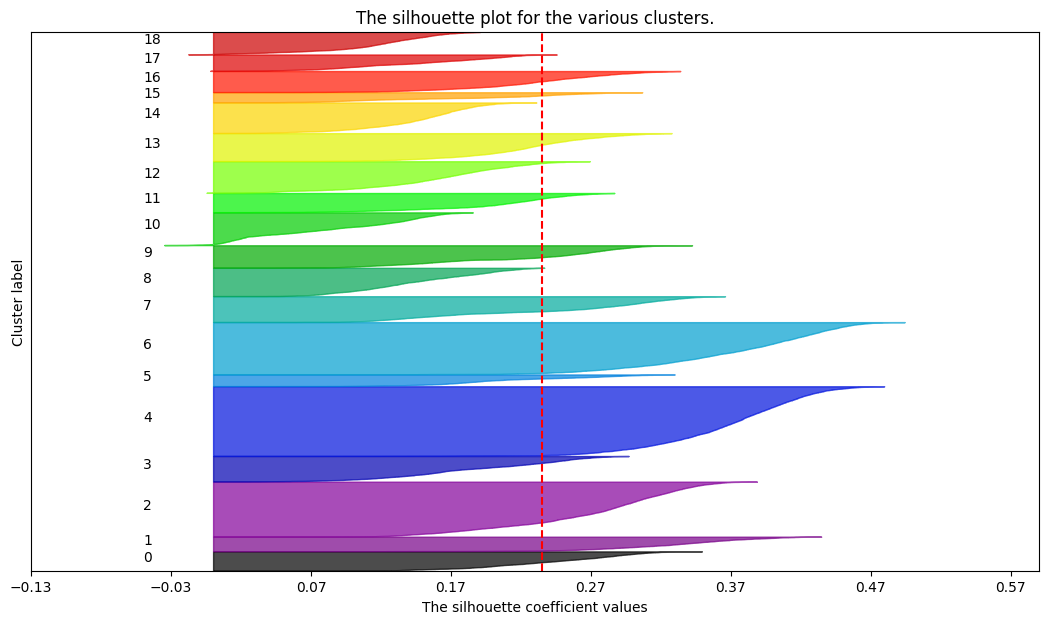

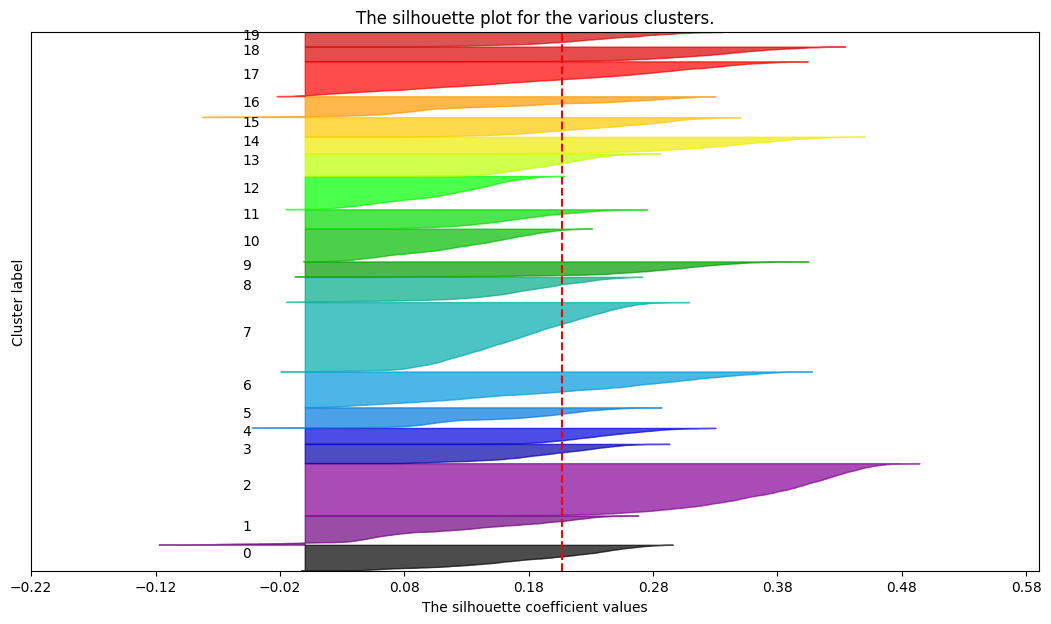

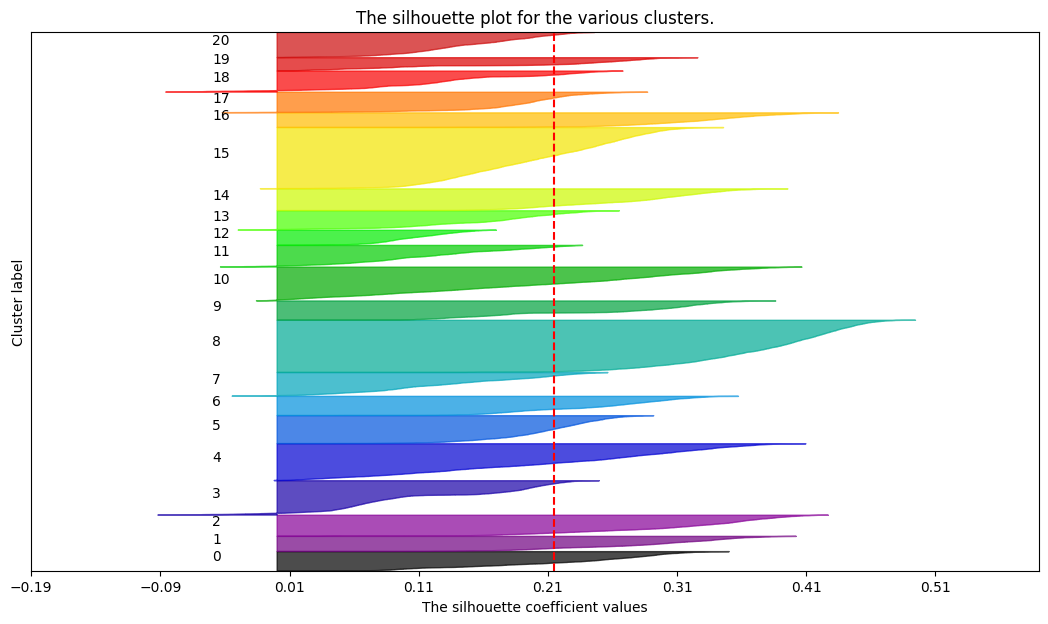

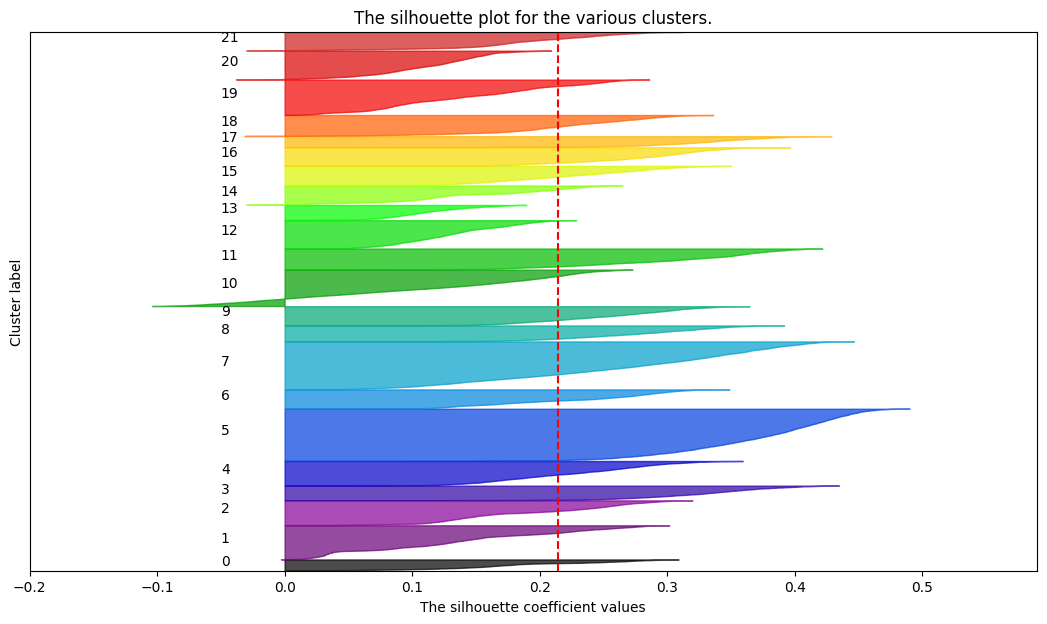

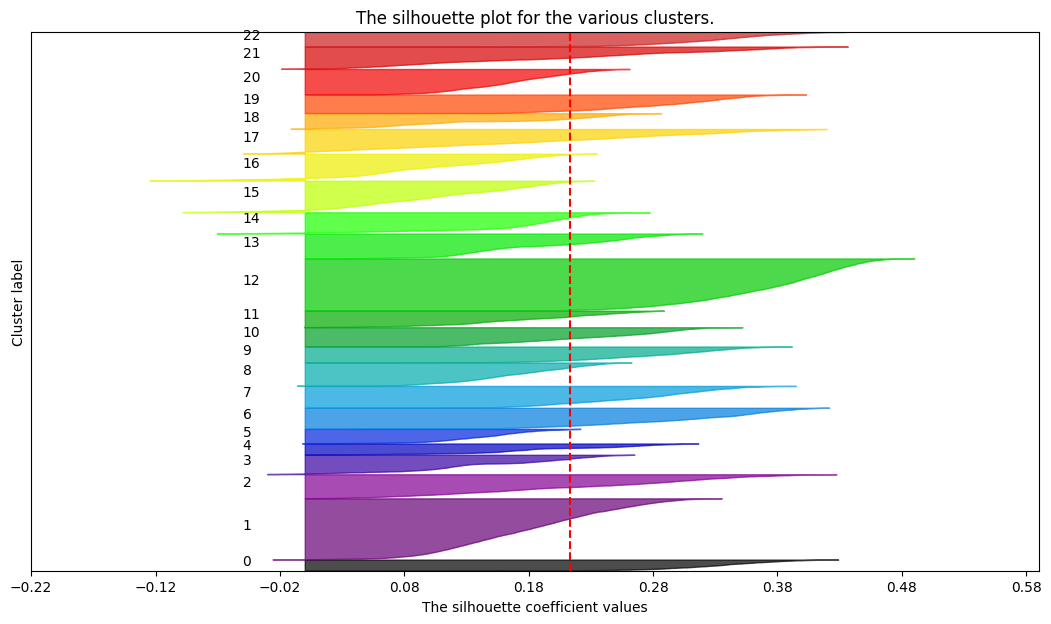

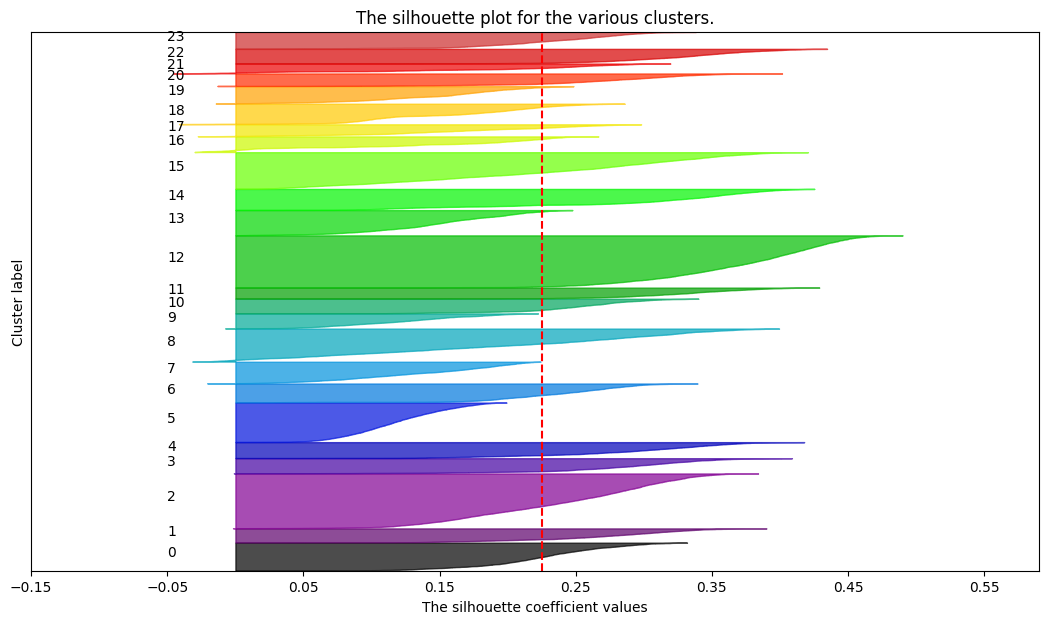

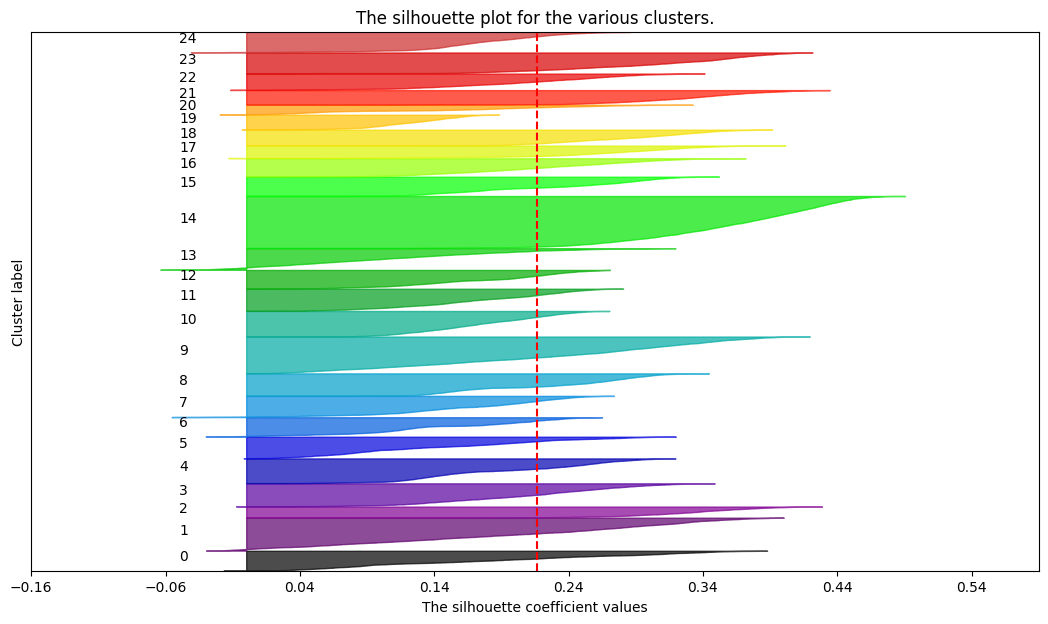

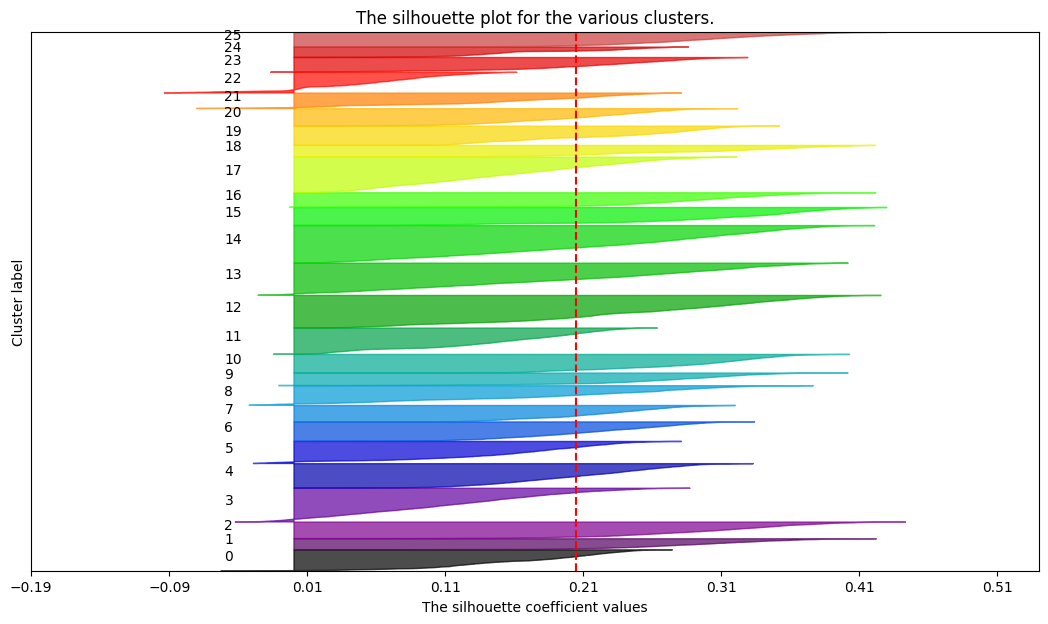

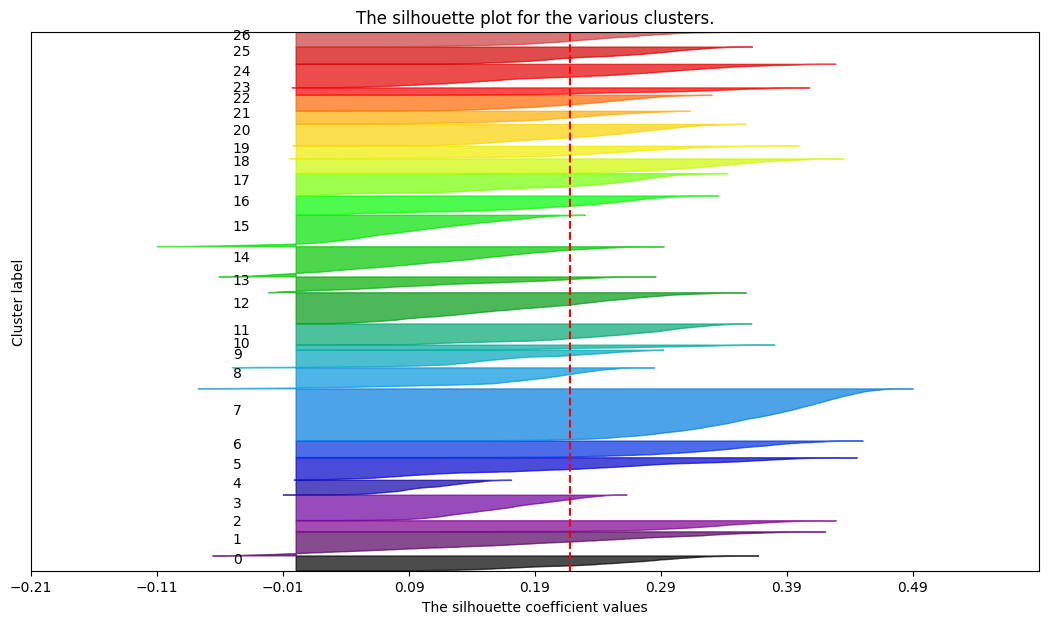

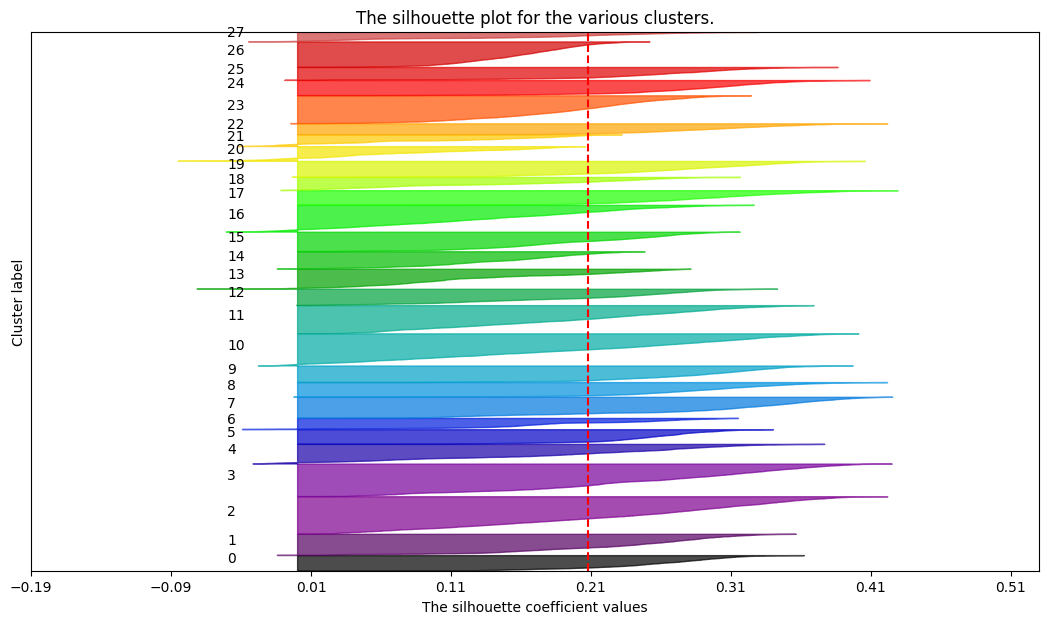

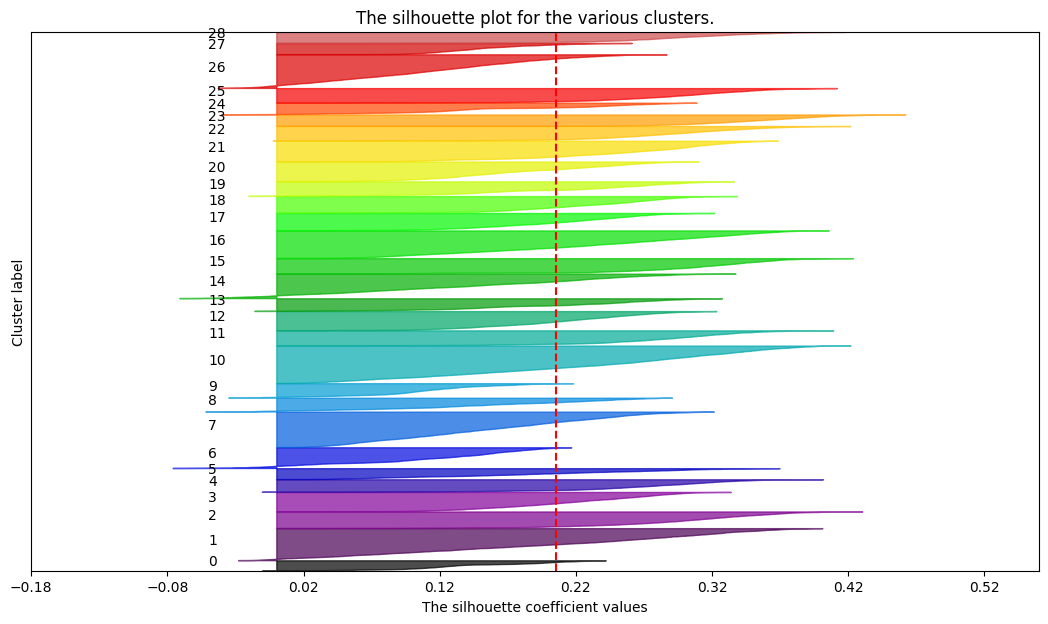

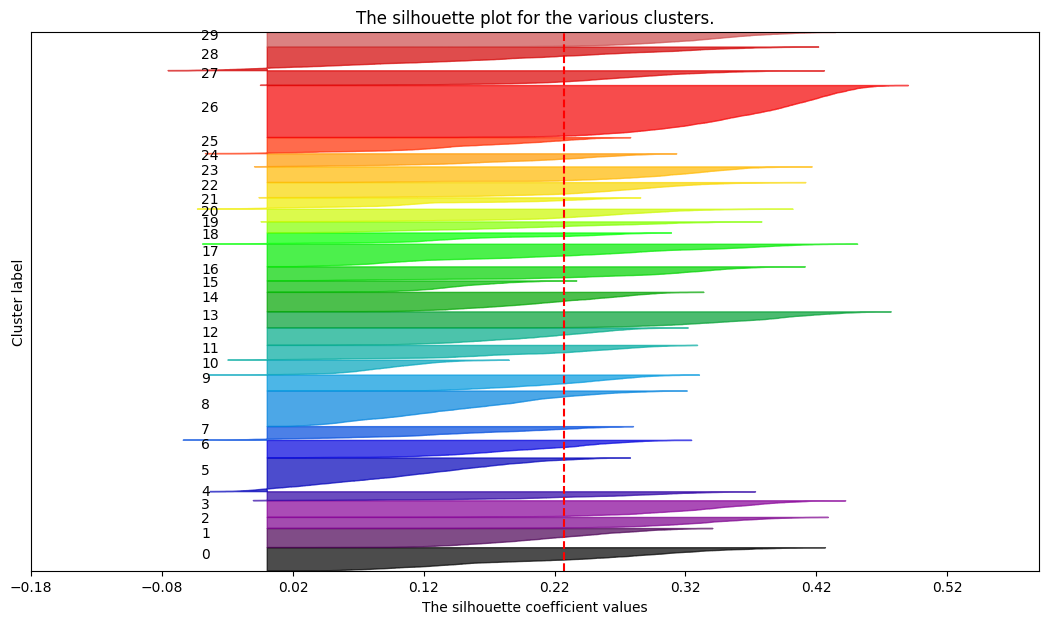

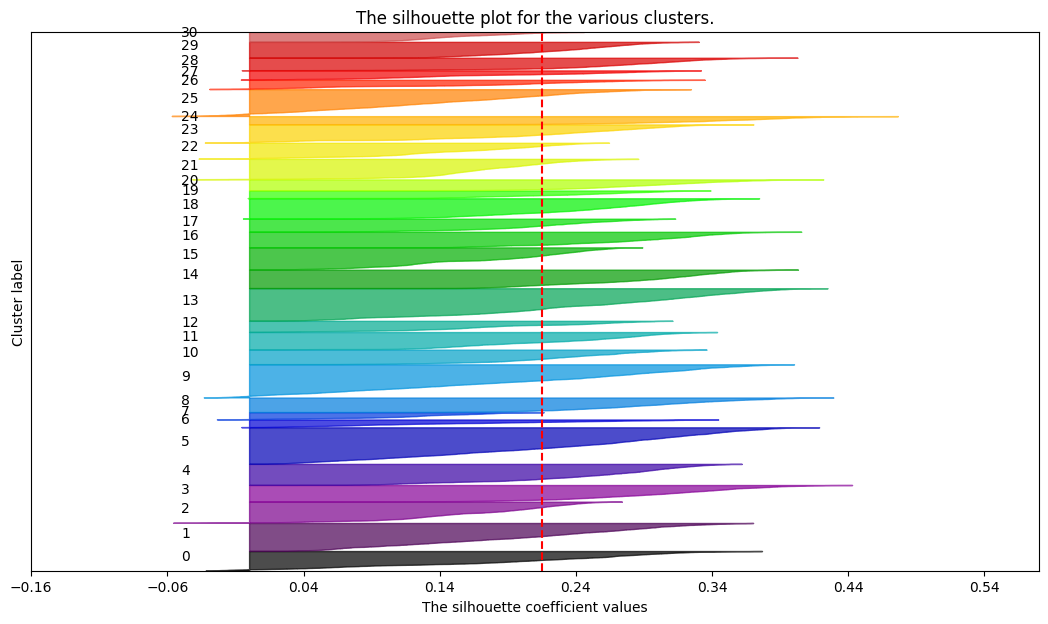

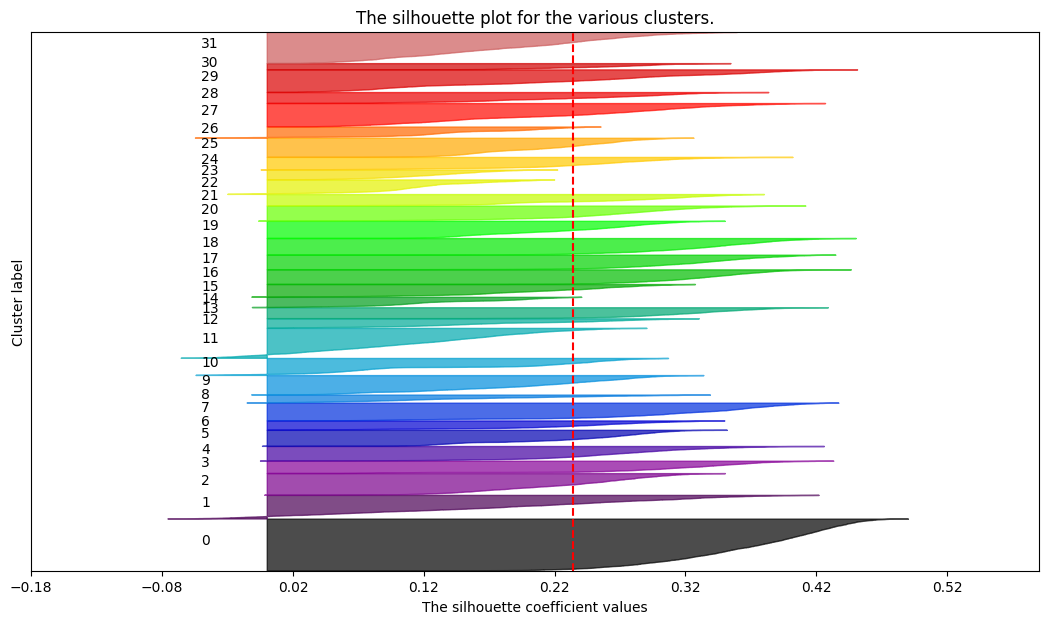

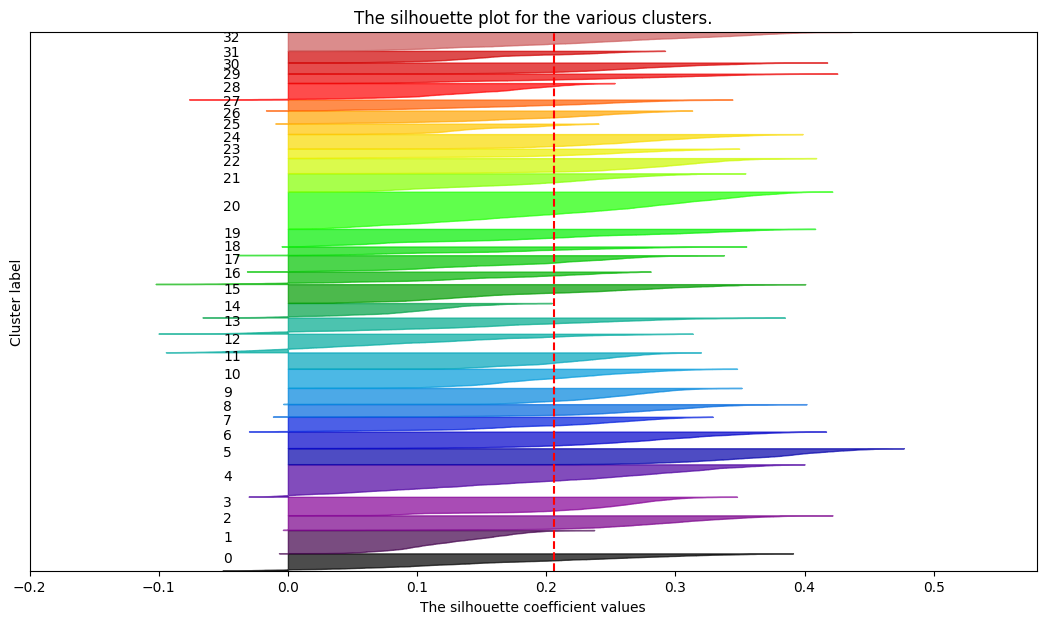

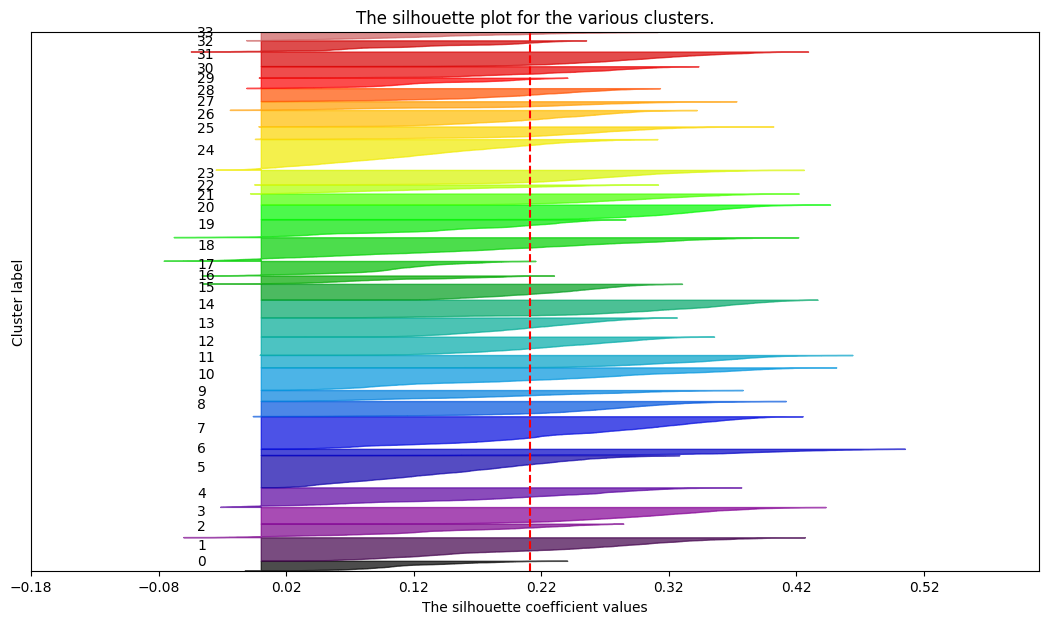

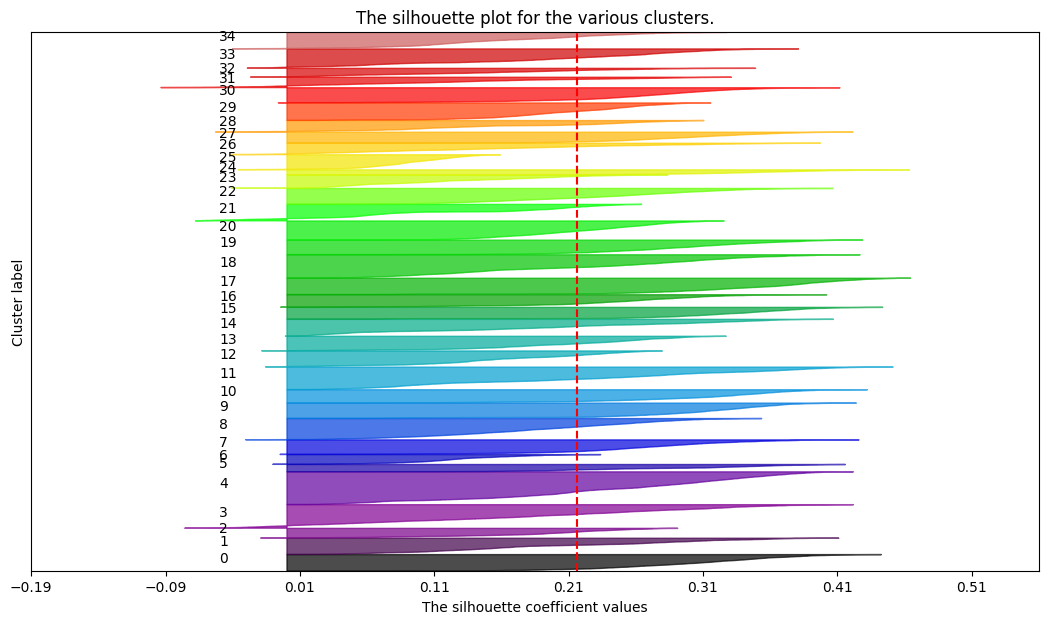

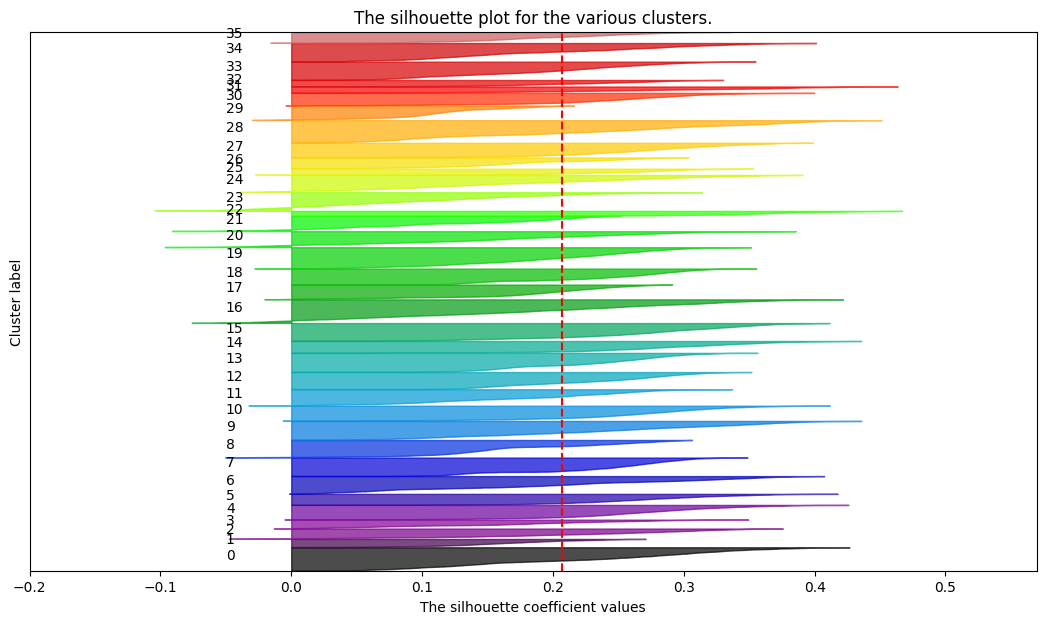

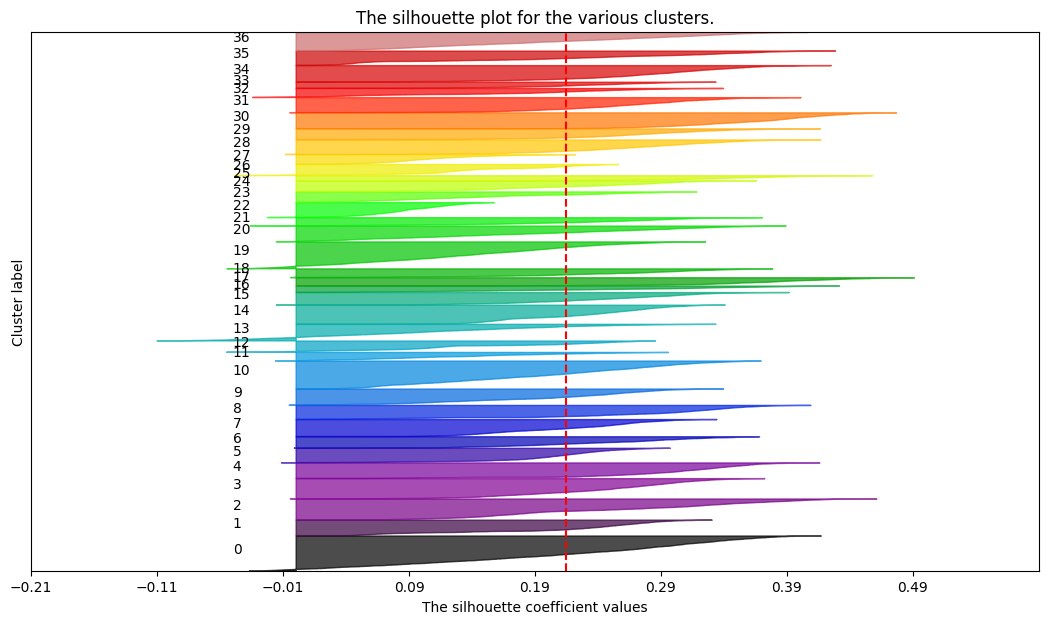

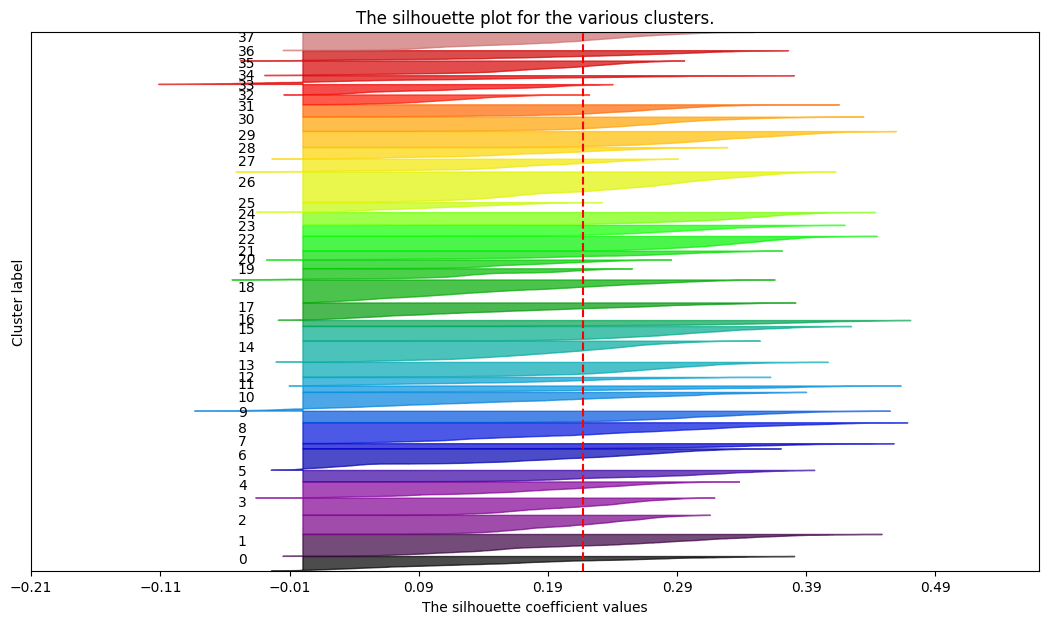

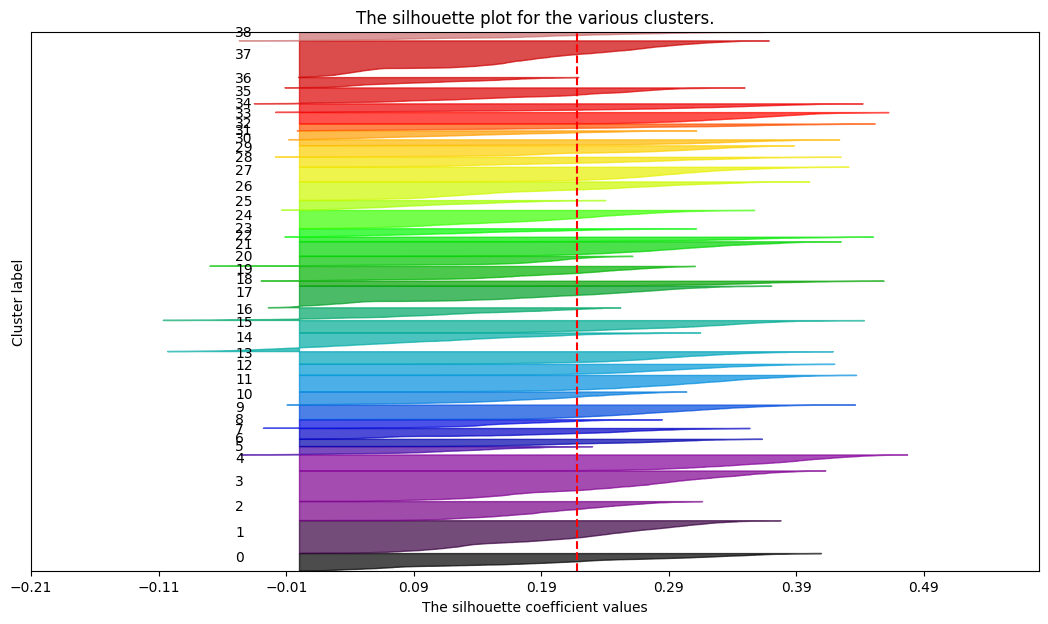

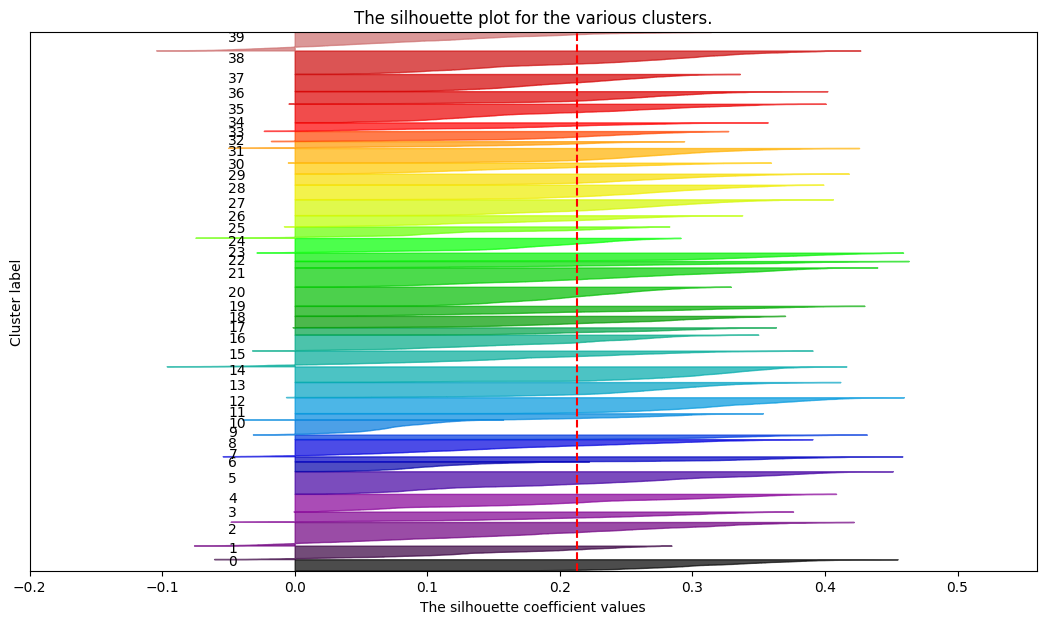

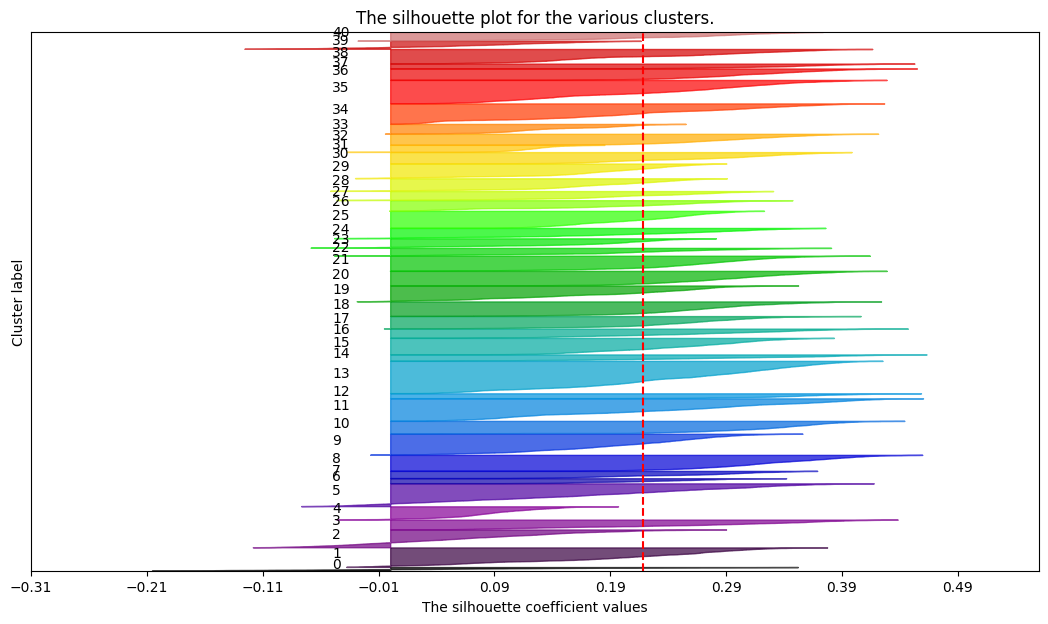

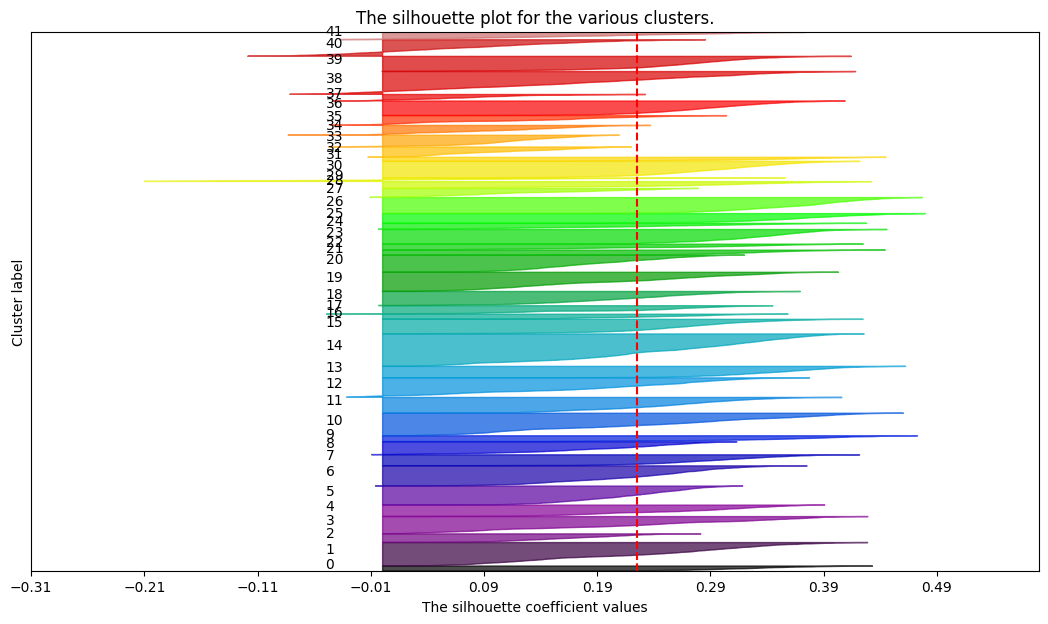

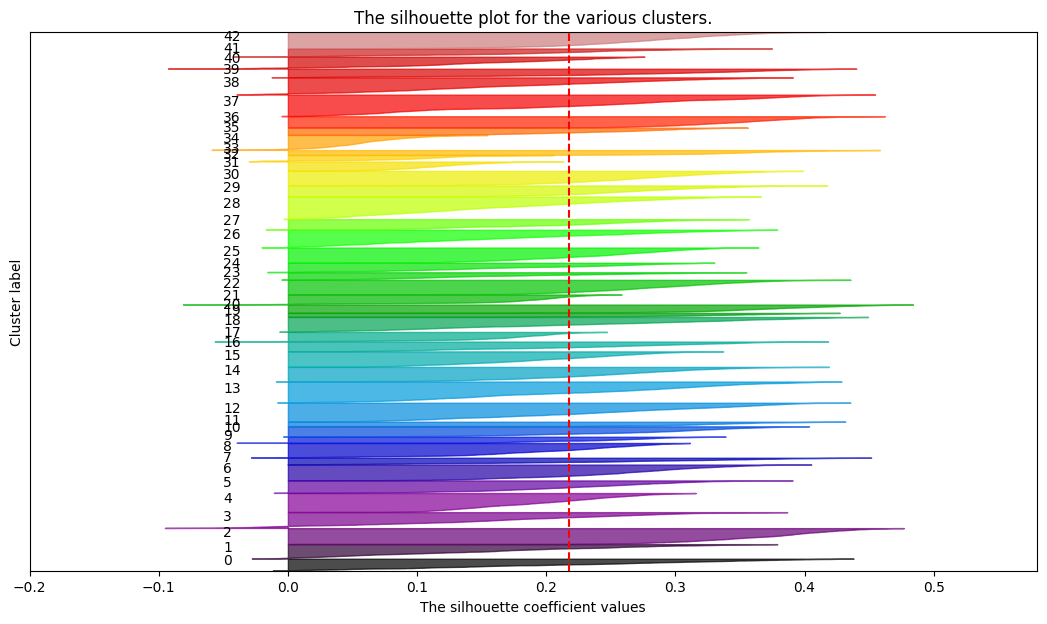

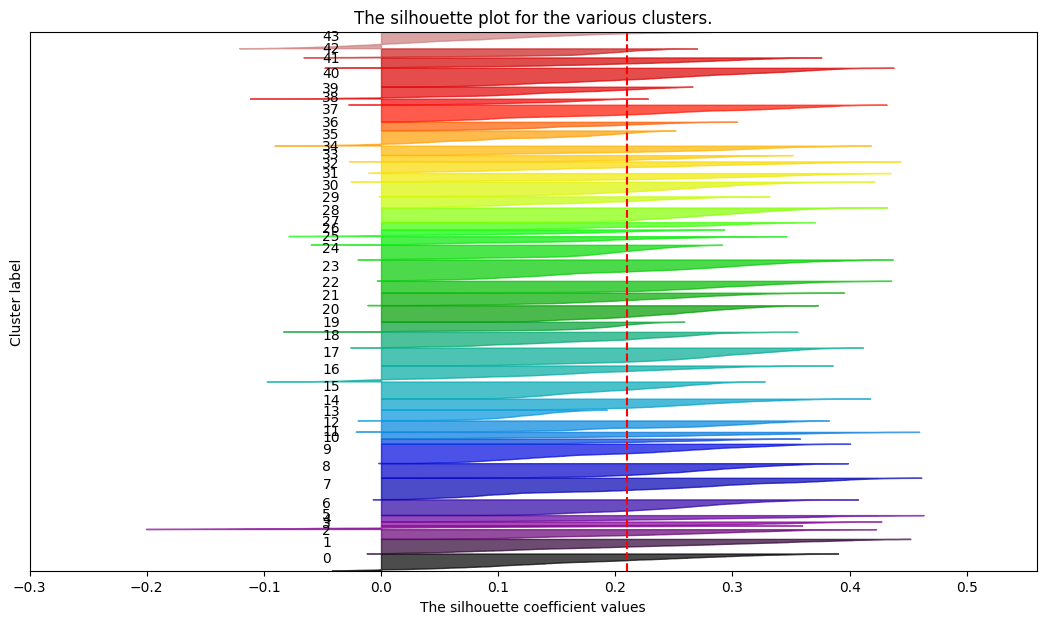

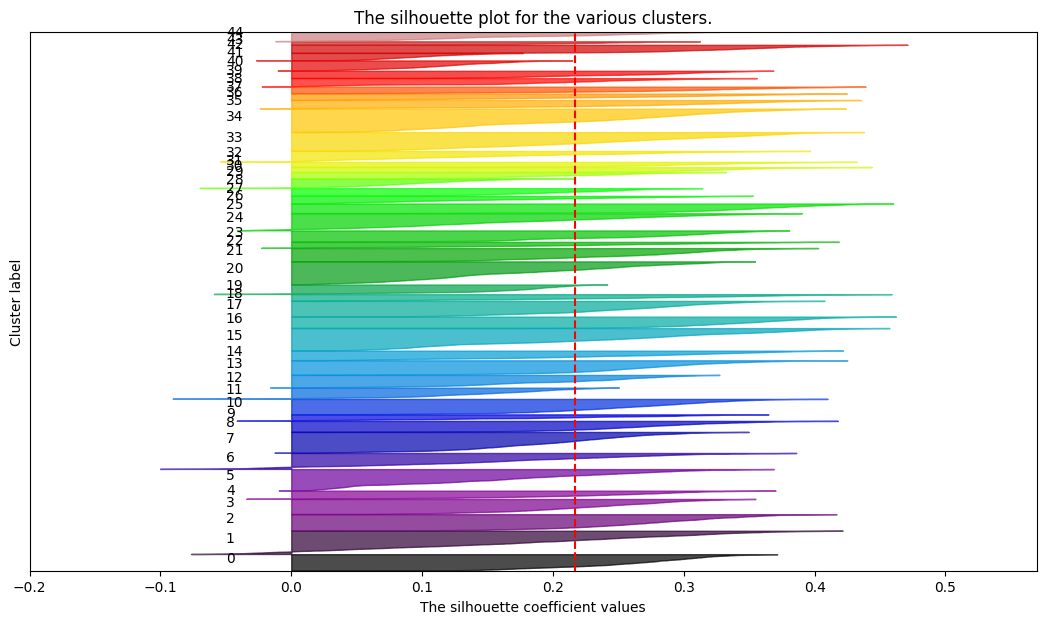

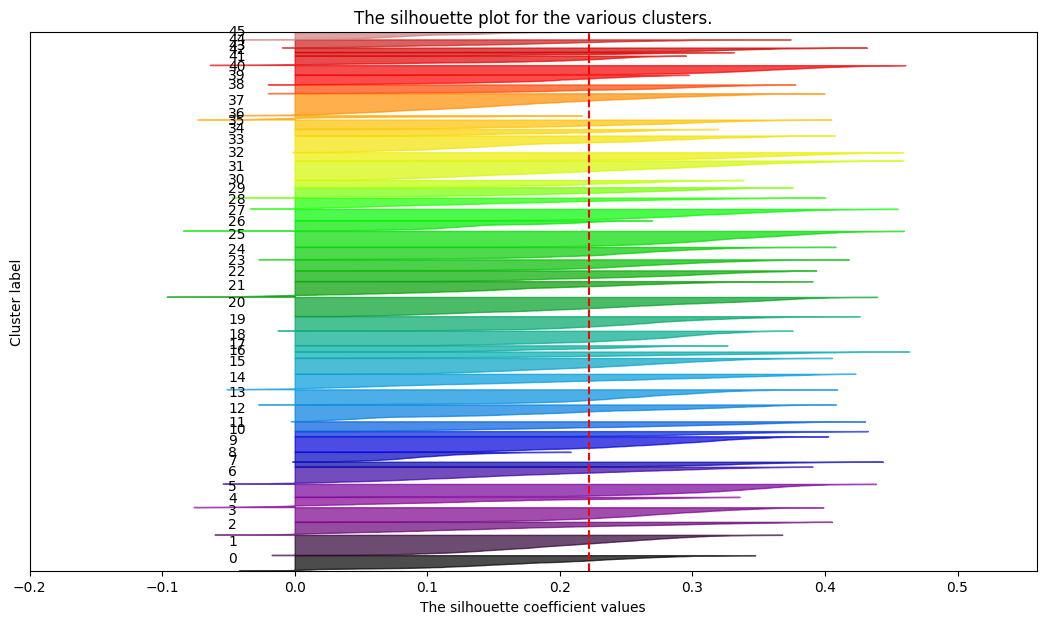

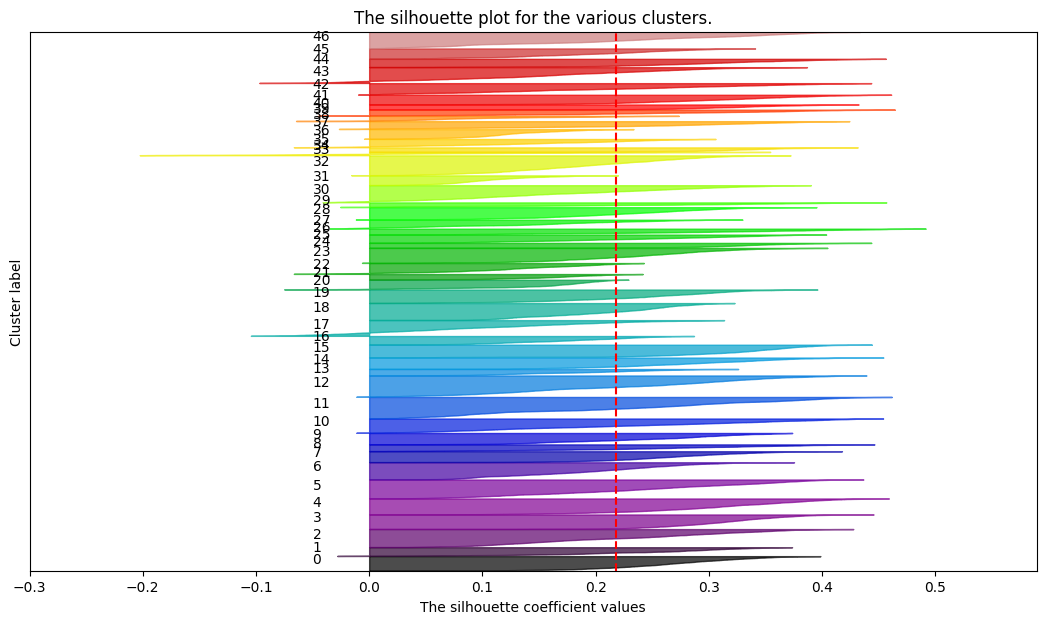

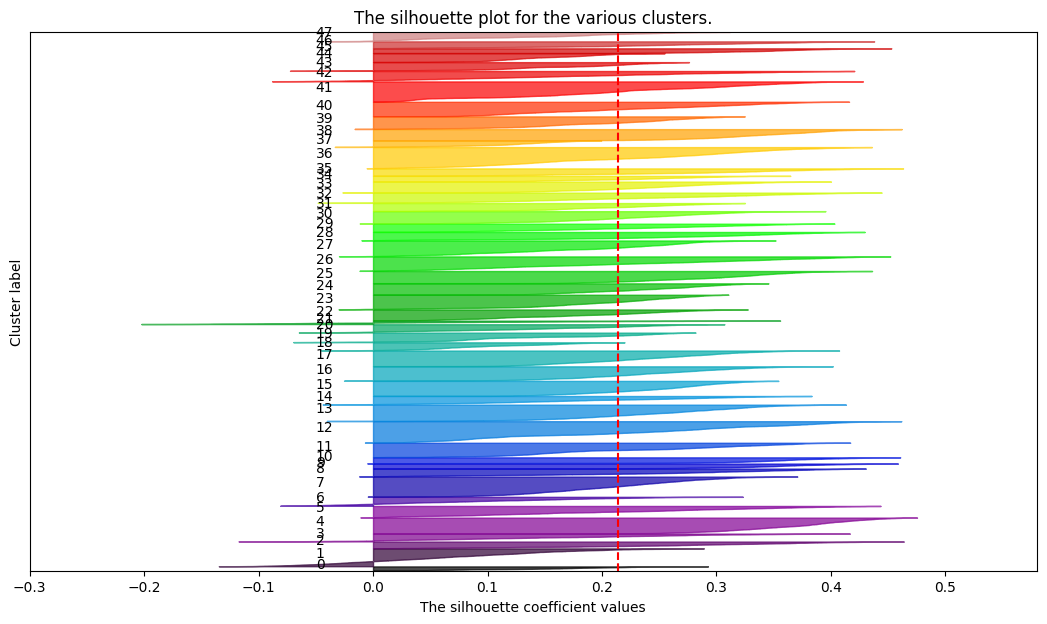

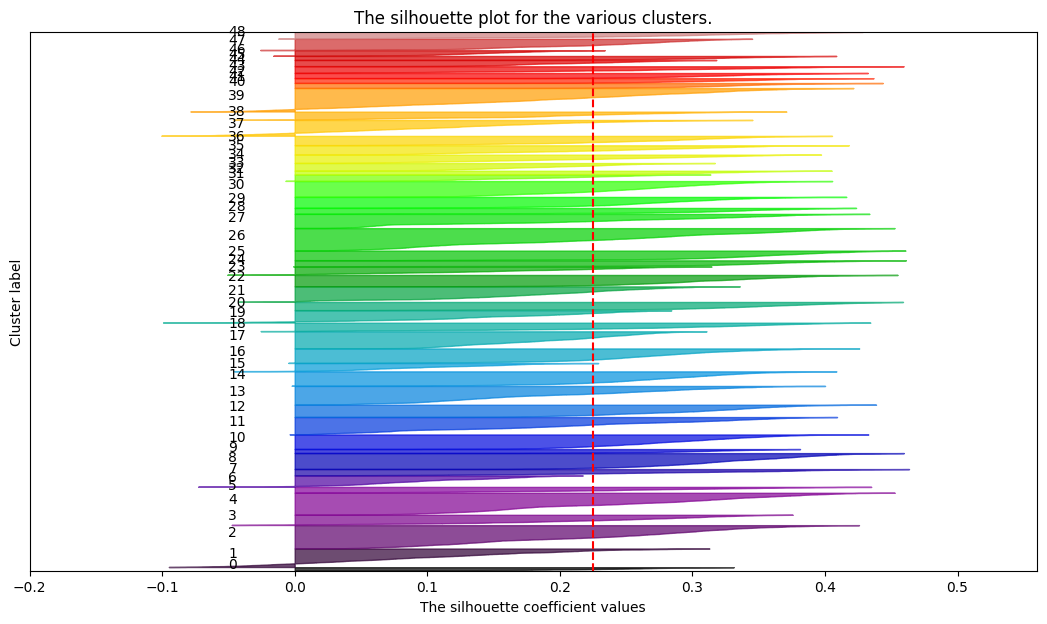

In [21]:
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])

    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))